## IBM Applied Data Science Capstone Project

#### Import libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


# Project Summary
### Project Background
Predict the severity of a car accident based on the road conditions, weather conditions and traffic conditions.
### Data Description
The dataset can be obtained freely through this link: https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv. The dataset has 37 attributes to classify the severity into 2 cases (Injury Collision and Property Damage Collision).

## CRISP-DM -- Car Accident Severity
### Business Problem
By predicting how an accident will be based on some critical conditions (road, weather, traffic, etc.), advise the driver the level of cautiousness or even an alternative plan to avoid unnecessary tragic.

### Data Description
The dataset can be obtained freely through this link: https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv. The dataset has 37 attributes to classify the severity into 2 cases (Injury Collision and Property Damage Collision).

In [3]:
dataset = pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv")
print("The data set dimension is " + str(dataset.shape))

The data set dimension is (194673, 38)


C:\Users\Li\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
dataset.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [5]:
dataset.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

#### Preliminary Analysis

In [10]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

# divide dataset by target label
df1 = dataset[dataset['SEVERITYCODE']==1]
df2 = dataset[dataset['SEVERITYCODE']==2]

Text(0, 0.5, 'Incident Proportion')

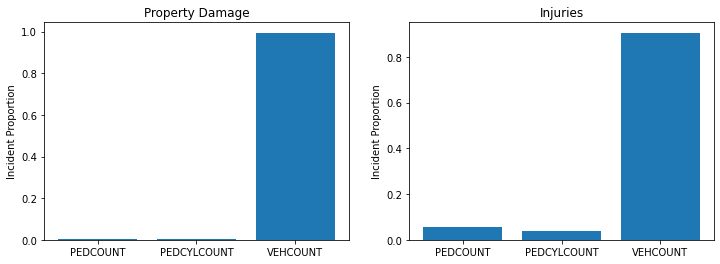

In [14]:
# damage distribution
features = ['SEVERITYCODE','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']
df_prop = df1[features].groupby(by=["SEVERITYCODE"]).sum()
df_inj = df2[features].groupby(by=["SEVERITYCODE"]).sum()

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
x=df_prop.columns
y1=np.divide(df_prop.to_numpy()[0], sum(df_prop.to_numpy()[0]))
y2=np.divide(df_inj.to_numpy()[0], sum(df_inj.to_numpy()[0]))
ax1.bar(x, y1)
ax2.bar(x, y2)
ax1.title.set_text('Property Damage')
ax2.title.set_text('Injuries')
ax1.set_ylabel('Incident Proportion')
ax2.set_ylabel('Incident Proportion')

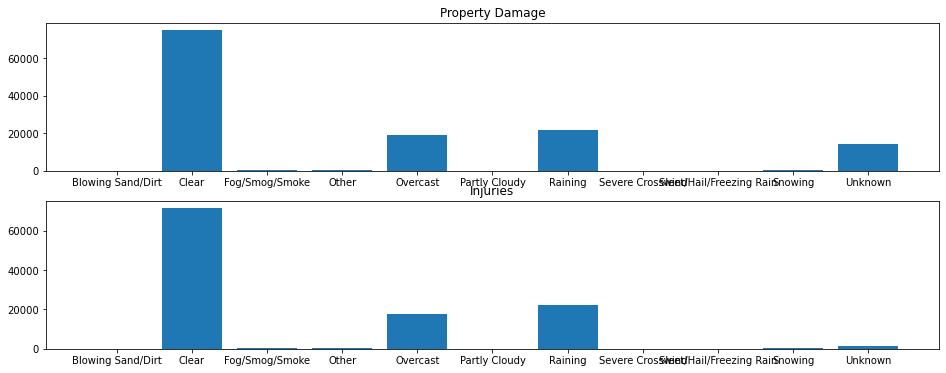

In [15]:
# weather distribution
y1=df1.groupby(by=['WEATHER']).sum()['SEVERITYCODE']
y2=df2.groupby(by=['WEATHER']).sum()['SEVERITYCODE']
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(16,6))
ax1.bar(y1.index, y1)
ax1.title.set_text('Property Damage')
ax2.bar(y2.index, y2)
ax2.title.set_text('Injuries')

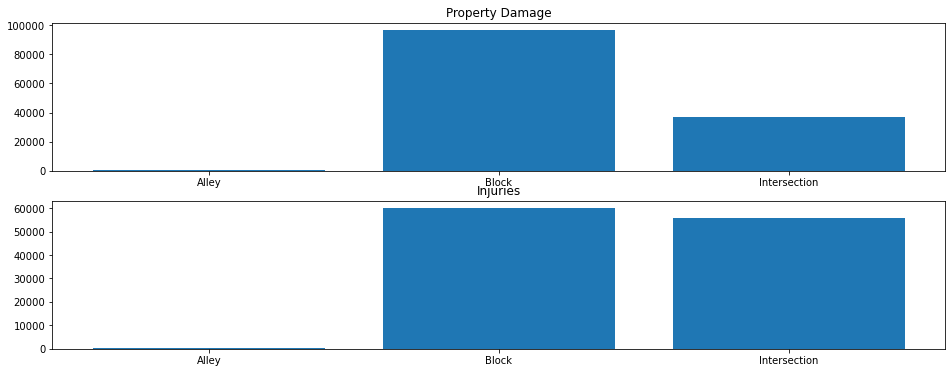

In [16]:
# address distribution
y1=df1.groupby(by=['ADDRTYPE']).sum()['SEVERITYCODE']
y2=df2.groupby(by=['ADDRTYPE']).sum()['SEVERITYCODE']
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(16,6))
ax1.bar(y1.index, y1)
ax1.title.set_text('Property Damage')
ax2.bar(y2.index, y2)
ax2.title.set_text('Injuries')

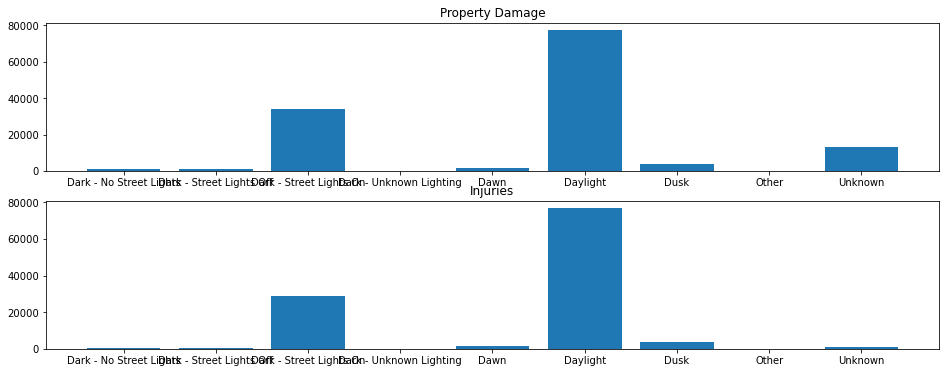

In [17]:
# light distribution
y1=df1.groupby(by=['LIGHTCOND']).sum()['SEVERITYCODE']
y2=df2.groupby(by=['LIGHTCOND']).sum()['SEVERITYCODE']
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(16,6))
ax1.bar(y1.index, y1)
ax1.title.set_text('Property Damage')
ax2.bar(y2.index, y2)
ax2.title.set_text('Injuries')

## Methodology
### Preprocessing

1. missing value

In [6]:
dataset.isna().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [7]:
# drop na rows
dataset.drop(dataset[dataset["X"].isnull() | \
                     dataset["COLLISIONTYPE"].isnull() | \
                     dataset["JUNCTIONTYPE"].isnull() | \
                     dataset["UNDERINFL"].isnull() | \
                     dataset["WEATHER"].isnull() | \
                     dataset["ROADCOND"].isnull()| \
                     dataset["LIGHTCOND"].isnull()].index,
             inplace=True)

In [8]:
# drop columns that have too many missing data, which makes it not useful
dataset.drop(["INTKEY", 
              "EXCEPTRSNCODE", 
              "EXCEPTRSNDESC", 
              "INATTENTIONIND", 
              "PEDROWNOTGRNT", 
              "SDOTCOLNUM", 
              "SPEEDING"], 
             axis=1, inplace=True)

In [9]:
dataset.isna().sum()

SEVERITYCODE      0
X                 0
Y                 0
OBJECTID          0
INCKEY            0
COLDETKEY         0
REPORTNO          0
STATUS            0
ADDRTYPE          0
LOCATION          0
SEVERITYCODE.1    0
SEVERITYDESC      0
COLLISIONTYPE     0
PERSONCOUNT       0
PEDCOUNT          0
PEDCYLCOUNT       0
VEHCOUNT          0
INCDATE           0
INCDTTM           0
JUNCTIONTYPE      0
SDOT_COLCODE      0
SDOT_COLDESC      0
UNDERINFL         0
WEATHER           0
ROADCOND          0
LIGHTCOND         0
ST_COLCODE        0
ST_COLDESC        0
SEGLANEKEY        0
CROSSWALKKEY      0
HITPARKEDCAR      0
dtype: int64

2. column analysis

In [10]:
# drop foreign key columns
dataset.drop(["OBJECTID", "INCKEY", "COLDETKEY", "REPORTNO"],
            axis=1,
            inplace=True)

In [11]:
# categorical columns
for col in dataset.columns.values.tolist():
    if dataset[col].dtype == object:
        print(col)
        print(dataset[col].value_counts())        

STATUS
Matched      180066
Unmatched         1
Name: STATUS, dtype: int64
ADDRTYPE
Block           117085
Intersection     62982
Name: ADDRTYPE, dtype: int64
LOCATION
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N    259
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST              246
6TH AVE AND JAMES ST                                        241
AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST              232
RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLELLAN ST       227
                                                           ... 
STONE AVE N AND N 96TH ST                                     1
30TH AVE NE BETWEEN NE 68TH ST AND NE 70TH E ST               1
31ST PL SW BETWEEN 31ST AVE SW AND SW ROXBURY ST              1
FRANKLIN AVE E BETWEEN BOYLSTON AVE E AND DEAD END            1
8TH AVE NE AND NE 56TH ST                                     1
Name: LOCATION, Length: 23460, dtype: int64
SEVERITYDESC
Property Damage Only Collision    124258
Injury Collision               

### column drops
1. STATUS --  only 1 entry belongs to a different category
2. LOCATION -- none useful string information. inferior compared to X, Y columns
3. INCATE -- less information thatn INCDTTM
4. SDOT_COLDES -- explantion of SDOT_COLCODE
5. ST_COLDES -- explantion of ST_COL
6. SEGLANEKEY, CROSSWALKKEY -- looks like location

In [12]:
dataset.drop(["STATUS", 
              "LOCATION",
              "INCDATE", 
              "SDOT_COLDESC", 
              "ST_COLDESC", 
              "SEGLANEKEY", "CROSSWALKKEY"
             ], 
             axis=1, 
             inplace=True)

In [13]:
dataset.head(10)

,SEVERITYCODE,X,Y,ADDRTYPE,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,HITPARKEDCAR
0,2,-122.323148,47.703140,Intersection,2,Injury Collision,Angles,2,0,0,2,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,N,Overcast,Wet,Daylight,10,N
1,1,-122.347294,47.647172,Block,1,Property Damage Only Collision,Sideswipe,2,0,0,2,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,0,Raining,Wet,Dark - Street Lights On,11,N
2,1,-122.334540,47.607871,Block,1,Property Damage Only Collision,Parked Car,4,0,0,3,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,0,Overcast,Dry,Daylight,32,N
3,1,-122.334803,47.604803,Block,1,Property Damage Only Collision,Other,3,0,0,3,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,N,Clear,Dry,Daylight,23,N
4,2,-122.306426,47.545739,Intersection,2,Injury Collision,Angles,2,0,0,2,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,0,Raining,Wet,Daylight,10,N
5,1,-122.387598,47.690575,Intersection,1,Property Damage Only Collision,Angles,2,0,0,2,4/20/2019 5:42:00 PM,At Intersection (intersection related),11,N,Clear,Dry,Daylight,10,N
6,1,-122.338485,47.618534,Intersection,1,Property Damage Only Collision,Angles,2,0,0,2,12/9/2008,At Intersection (intersection related),11,0,Raining,Wet,Daylight,10,N
7,2,-122.320780,47.614076,Intersection,2,Injury Collision,Cycles,3,0,1,1,4/15/2020 5:47:00 PM,At Intersection (intersection related),51,N,Clear,Dry,Daylight,5,N
8,1,-122.335930,47.611904,Block,1,Property Damage Only Collision,Parked Car,2,0,0,2,6/15/2006 1:00:00 PM,Mid-Block (not related to intersection),11,0,Clear,Dry,Daylight,32,N
9,2,-122.384700,47.528475,Intersection,2,Injury Collision,Angles,2,0,0,2,3/20/2006 3:49:00 PM,At Intersection (intersection related),11,0,Clear,Dry,Daylight,10,N


### column drops continue
1. SEVERITYCODE.1 -- the same as the target label SEVERITYCODE
2. SEVERITYDESC -- explanation of severity

In [14]:
dataset.drop(["SEVERITYCODE.1", "SEVERITYDESC"], 
             axis=1, 
             inplace=True)

In [15]:
dataset.head(5)

,SEVERITYCODE,X,Y,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,HITPARKEDCAR
0,2,-122.323148,47.703140,Intersection,Angles,2,0,0,2,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,N,Overcast,Wet,Daylight,10,N
1,1,-122.347294,47.647172,Block,Sideswipe,2,0,0,2,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,0,Raining,Wet,Dark - Street Lights On,11,N
2,1,-122.334540,47.607871,Block,Parked Car,4,0,0,3,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,0,Overcast,Dry,Daylight,32,N
3,1,-122.334803,47.604803,Block,Other,3,0,0,3,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,N,Clear,Dry,Daylight,23,N
4,2,-122.306426,47.545739,Intersection,Angles,2,0,0,2,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,0,Raining,Wet,Daylight,10,N


In [16]:
dataset.describe()

,SEVERITYCODE,X,Y,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE
count,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000
mean,1.309935,-122.330462,47.619501,2.479405,0.039413,0.030144,1.974498,14.323891
std,0.462468,0.029977,0.056331,1.369008,0.204023,0.172311,0.560060,6.462207
min,1.000000,-122.419091,47.495573,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,-122.348640,47.575576,2.000000,0.000000,0.000000,2.000000,11.000000
50%,1.000000,-122.330168,47.615282,2.000000,0.000000,0.000000,2.000000,13.000000
75%,2.000000,-122.311926,47.663939,3.000000,0.000000,0.000000,2.000000,14.000000
max,2.000000,-122.238949,47.734142,81.000000,6.000000,2.000000,12.000000,69.000000


3. Categorical Data Preprocessing

#### INCDTTM to accident hour

In [17]:
def parse_time_to_hours(timestamp):
    '''timestamp format: m/dd/yyyy h:mm:ss PM/AM'''
    t=timestamp.split(' ')
    try:
        hr=t[1].split(':')
        hr=float(hr[0]) + float(hr[1])/60 + float(hr[2])/3600
        return hr+12 if t[2]=='PM' else hr
    except:
        return np.nan

In [18]:
# parse incident time to hour
dataset['INCIDENTHOUR']=dataset['INCDTTM'].apply(lambda x: parse_time_to_hours(x))
dataset['INCIDENTHOUR'].isna().sum()

24664

In [19]:
dataset.drop(dataset[dataset['INCIDENTHOUR'].isnull()].index, inplace=True)
dataset.drop(['INCDTTM'], axis=1, inplace=True)
dataset.head()

,SEVERITYCODE,X,Y,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,HITPARKEDCAR,INCIDENTHOUR
0,2,-122.323148,47.703140,Intersection,Angles,2,0,0,2,At Intersection (intersection related),11,N,Overcast,Wet,Daylight,10,N,14.900000
1,1,-122.347294,47.647172,Block,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),16,0,Raining,Wet,Dark - Street Lights On,11,N,18.916667
2,1,-122.334540,47.607871,Block,Parked Car,4,0,0,3,Mid-Block (not related to intersection),14,0,Overcast,Dry,Daylight,32,N,10.333333
3,1,-122.334803,47.604803,Block,Other,3,0,0,3,Mid-Block (not related to intersection),11,N,Clear,Dry,Daylight,23,N,9.433333
4,2,-122.306426,47.545739,Intersection,Angles,2,0,0,2,At Intersection (intersection related),11,0,Raining,Wet,Daylight,10,N,8.066667


#### UNDERINFL -- yes to 1, no to 0

In [20]:
dataset['UNDERINFL'] = dataset['UNDERINFL'].apply(lambda x: 0 if x=='0'or x=='no' else 1)

#### HITPARKEDCAR -- Y to 1 N to 0

In [21]:
dataset['HITPARKEDCAR'] = dataset['HITPARKEDCAR'].apply(lambda x: 0 if x=='N' else 1)

In [22]:
dataset.head()

,SEVERITYCODE,X,Y,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,HITPARKEDCAR,INCIDENTHOUR
0,2,-122.323148,47.703140,Intersection,Angles,2,0,0,2,At Intersection (intersection related),11,1,Overcast,Wet,Daylight,10,0,14.900000
1,1,-122.347294,47.647172,Block,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),16,0,Raining,Wet,Dark - Street Lights On,11,0,18.916667
2,1,-122.334540,47.607871,Block,Parked Car,4,0,0,3,Mid-Block (not related to intersection),14,0,Overcast,Dry,Daylight,32,0,10.333333
3,1,-122.334803,47.604803,Block,Other,3,0,0,3,Mid-Block (not related to intersection),11,1,Clear,Dry,Daylight,23,0,9.433333
4,2,-122.306426,47.545739,Intersection,Angles,2,0,0,2,At Intersection (intersection related),11,0,Raining,Wet,Daylight,10,0,8.066667


## convert categorical columns to dummy variables

In [23]:
column_names = ["ADDRTYPE", "COLLISIONTYPE", "JUNCTIONTYPE", "SDOT_COLCODE", "WEATHER", "ROADCOND", "LIGHTCOND", "ST_COLCODE"]
categorical_columns = dataset[column_names]
dummy_columns = pd.get_dummies(categorical_columns, drop_first=True)
df=dataset.copy()
df.drop(column_names, axis=1, inplace=True)
df = pd.concat([df, dummy_columns], axis=1)

In [24]:
df.head()
#dataset.head()

,SEVERITYCODE,X,Y,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,HITPARKEDCAR,INCIDENTHOUR,...,ST_COLCODE_73,ST_COLCODE_74,ST_COLCODE_8,ST_COLCODE_81,ST_COLCODE_82,ST_COLCODE_83,ST_COLCODE_84,ST_COLCODE_85,ST_COLCODE_87,ST_COLCODE_88
0,2,-122.323148,47.703140,2,0,0,2,1,0,14.900000,...,0,0,0,0,0,0,0,0,0,0
1,1,-122.347294,47.647172,2,0,0,2,0,0,18.916667,...,0,0,0,0,0,0,0,0,0,0
2,1,-122.334540,47.607871,4,0,0,3,0,0,10.333333,...,0,0,0,0,0,0,0,0,0,0
3,1,-122.334803,47.604803,3,0,0,3,1,0,9.433333,...,0,0,0,0,0,0,0,0,0,0
4,2,-122.306426,47.545739,2,0,0,2,0,0,8.066667,...,0,0,0,0,0,0,0,0,0,0


## EDA
1. severity distribution

In [25]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot') # optional: for ggplot-like style

df_1 = df.loc[df['SEVERITYCODE']==1]
df_2 = df.loc[df['SEVERITYCODE']==2]

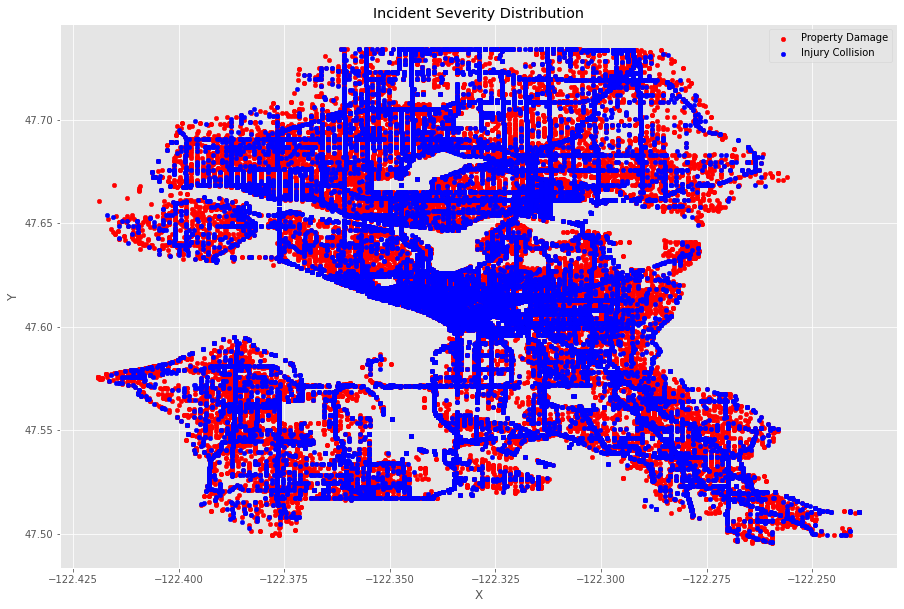

In [26]:
ax1 = df_1.plot(kind='scatter', x='X', y='Y', figsize=(15,10), color='red', label='Property Damage')
df_2.plot(kind='scatter', x='X', y='Y', color='blue', ax=ax1, label='Injury Collision')
ax1.set_title('Incident Severity Distribution')
ax1.legend()
plt.show()

2. Correlation

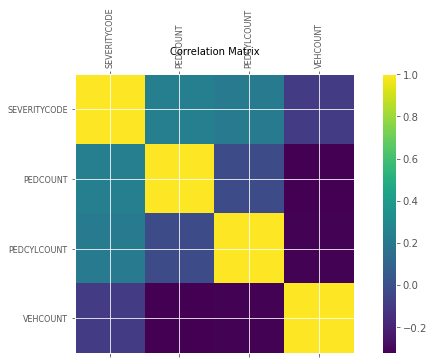

In [27]:
cols = ['SEVERITYCODE','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']

f = plt.figure(figsize=(10, 5))
plt.matshow(df[cols].corr(), fignum=f.number)
plt.xticks(range(df[cols].shape[1]), df[cols].columns, fontsize=8, rotation=90)
plt.yticks(range(df[cols].shape[1]), df[cols].columns, fontsize=8)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix', fontsize=10);
plt.show()

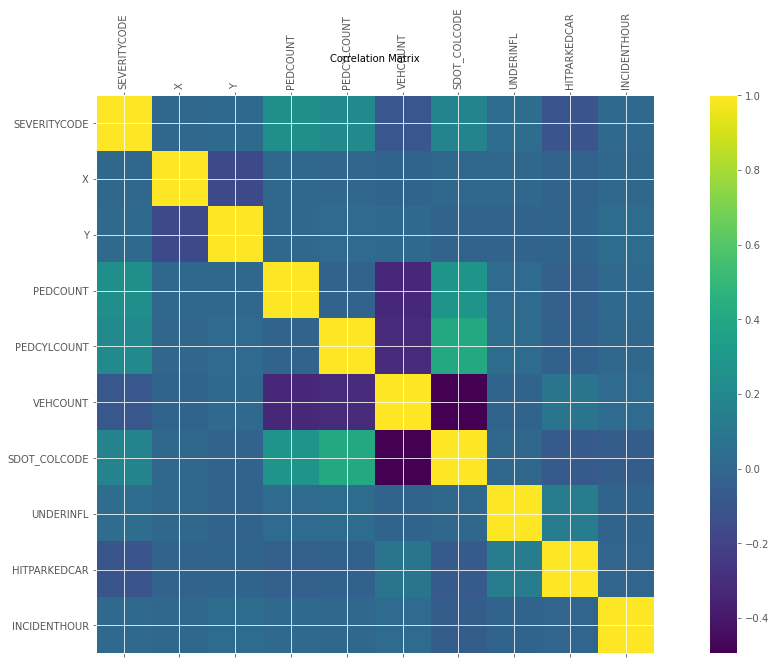

In [28]:
cols = ['SEVERITYCODE','X','Y','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT',
       'SDOT_COLCODE','UNDERINFL','HITPARKEDCAR','INCIDENTHOUR']
f = plt.figure(figsize=(20, 10))
plt.matshow(dataset[cols].corr(), fignum=f.number)
plt.xticks(range(dataset[cols].shape[1]), dataset[cols].columns, fontsize=10, rotation=90)
plt.yticks(range(dataset[cols].shape[1]), dataset[cols].columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix', fontsize=10);
plt.show()

### Training Prep

In [29]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X = df.iloc[:,1:]
y = df.iloc[:,0]
X = preprocessing.StandardScaler().fit(X).transform(X)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (124322, 163) (124322,)
Test set: (31081, 163) (31081,)


## Training Model
### KNN
Since there are location features (X,Y), and weather condition, road condition and even culture (carpooling or not, popular to DUA or not, etc) are somewhat related to geographic distribution. Therefore, by using KNN, it may give us some interesting result.

In [31]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix #,classification_report
from sklearn.neighbors import KNeighborsClassifier
from datetime import datetime

In [32]:
# since knn is not good at high-dimensional data, ST_COLCODE and SDOT_COLCODE has to be taken out
knn_cols = [col for col in df.columns if ('ST_COLCODE' not in col) and ('SDOT_COLCODE' not in col)]
#knn_cols

In [33]:
X_knn = df[knn_cols].iloc[:,1:]
X_knn = preprocessing.StandardScaler().fit(X_knn).transform(X_knn)
y_knn = df.iloc[:,0]

In [34]:
X_knn_train, X_knn_test, y_knn_train, y_knn_test = train_test_split(X_knn, y_knn, test_size=0.2, random_state=7)
print ('Train set:', X_knn_train.shape,  y_knn_train.shape)
print ('Test set:', X_knn_test.shape,  y_knn_test.shape)

Train set: (124322, 51) (124322,)
Test set: (31081, 51) (31081,)


In [35]:
X_knn_train_KNN, X_knn_test_KNN, y_knn_train_KNN, y_knn_test_KNN = train_test_split(X_knn_train, y_knn_train, 
                                                                                    test_size=0.2, random_state=7)

In [37]:
X_knn_train_KNN.shape

(99457, 51)

1  finished running at  2020-09-27 19:55:20.005666
2  finished running at  2020-09-27 19:59:04.355933
3  finished running at  2020-09-27 20:02:50.431080
4  finished running at  2020-09-27 20:06:33.879770
5  finished running at  2020-09-27 20:10:18.582876
6  finished running at  2020-09-27 20:14:05.503111
7  finished running at  2020-09-27 20:17:52.127566
8  finished running at  2020-09-27 20:21:46.333218
9  finished running at  2020-09-27 20:25:36.251841
10  finished running at  2020-09-27 20:29:23.577977
11  finished running at  2020-09-27 20:33:12.740860
12  finished running at  2020-09-27 20:36:59.926251
13  finished running at  2020-09-27 20:40:52.263870
14  finished running at  2020-09-27 20:45:03.086274
15  finished running at  2020-09-27 20:48:50.177512
16  finished running at  2020-09-27 20:52:50.501400
17  finished running at  2020-09-27 20:56:45.318394
18  finished running at  2020-09-27 21:00:42.533144
19  finished running at  2020-09-27 21:04:35.327013
20  finished running 

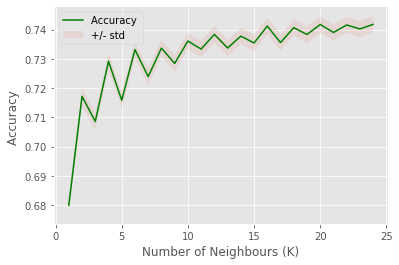

In [38]:
Ks = 25
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    # Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_knn_train_KNN,y_knn_train_KNN)
    yhat=neigh.predict(X_knn_test_KNN)
    mean_acc[n-1] = accuracy_score(y_knn_test_KNN, yhat)
    std_acc[n-1]=np.std(yhat==y_knn_test_KNN)/np.sqrt(yhat.shape[0])
    
    print(n, ' finished running at ', datetime.now())
    
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- std'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.show()

#### K=10 is the best

In [40]:
neigh = KNeighborsClassifier(n_neighbors = 10).fit(X_knn_train, y_knn_train)

### SVM
Since SVM is the really efficient at high dimensional data, it will be able to digest more features than KNN

In [42]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

### Results Analysis (Model Evaluation)
#### KNN


In [44]:
yhat=neigh.predict(X_knn_test)
f1score_KNN=round(f1_score(y_knn_test, yhat, average='weighted'),2)
print("KNN's evaluation F1-score: ", "{:10.2f}".format(f1score_KNN) )

KNN's evaluation F1-score:        0.71


#### SVM

In [45]:
yhat = clf.predict(X_test)

f1score_SVM=round(f1_score(y_test, yhat, average='weighted') ,2)
print("SVM evaluation F1-score: ",  "{:10.2f}".format(f1score_SVM))

SVM evaluation F1-score:        0.71


### Discussion
1. About CRISP-DM
    after finishing this capstone project, I found out that it is better to do EDA prior to data preprocessing. dropping N/A values or converting categorical columns into may sometimes make it more difficult to have a first intuitive perception against the raw data
2. About data preprocessing
    it may produce a better learning if there are more information associated to each column. Correlation analysis is not nearly enough. And, for example, I only extracted hour information from INCDTTM column since the date may not carry enough information. However, there may be some implicit day or month and severity relationship which would have increase the model accuracy
3. About KNN
    it is slow and not effective against high dimensional data. therefore, I took out the ST_COLCODE and SDOT_COLCODE features. While I was tempted to convert other remaining categorical columns into numerical values instead of dummy columns, I didn't do that implementation because the distance between 1 and 2 and 1 and 9 should be treated the same, in the aspect of categorical values.

### Conclusion
    
Based on the limited data, the study indicates that based on the hours, junction type, road condition, weather and other driving condition, people can have a basic prediction on what kind of accident it is more likely to occur. 